<center><H1 style = "color: green">GERMAN CREDIT RISK ANALYSIS</H1> </center>

***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('german_credit_data.csv' )

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
df.shape

(1000, 11)

In [5]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [6]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [7]:
df = df.fillna('Unknown')
df.isna().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [8]:
for i in df.columns:
    print(f'Unique values in {i}: {df[i].unique()}')

Unique values in Unnamed: 0: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 2

In [9]:
df=df.rename(columns={'Unnamed: 0':'Id'})

In [10]:
df.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,Unknown,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,Unknown,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   1000 non-null   object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [12]:
df.describe()

,Id,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [13]:
df.columns

Index(['Id', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [14]:
df.groupby(['Sex','Risk'])['Purpose'].value_counts()

Sex     Risk  Purpose            
female  bad   car                     40
              furniture/equipment     28
              radio/TV                19
              education                9
              business                 7
              domestic appliances      2
              repairs                  2
              vacation/others          2
        good  radio/TV                66
              car                     54
              furniture/equipment     46
              education               15
              business                12
              domestic appliances      4
              repairs                  3
              vacation/others          1
male    bad   car                     66
              radio/TV                43
              furniture/equipment     30
              business                27
              education               14
              repairs                  6
              vacation/others          3
              domestic 

In [15]:
df.groupby(['Purpose','Risk'])['Sex'].value_counts()

Purpose              Risk  Sex   
business             bad   male       27
                           female      7
                     good  male       51
                           female     12
car                  bad   male       66
                           female     40
                     good  male      177
                           female     54
domestic appliances  bad   female      2
                           male        2
                     good  female      4
                           male        4
education            bad   male       14
                           female      9
                     good  male       21
                           female     15
furniture/equipment  bad   male       30
                           female     28
                     good  male       77
                           female     46
radio/TV             bad   male       43
                           female     19
                     good  male      152
                       

## <span style = "color: orange"> Data Visualization </span>

<Axes: xlabel='Risk', ylabel='count'>

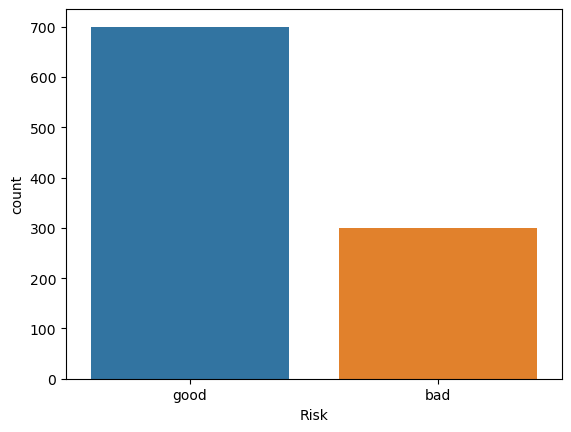

In [16]:
sns.countplot(x = df['Risk'])

<Axes: xlabel='Sex', ylabel='count'>

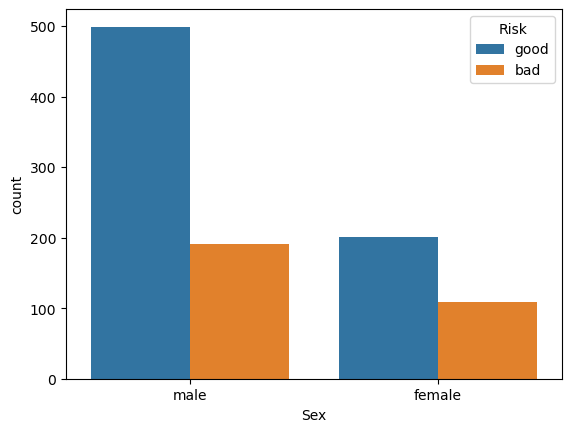

In [17]:
sns.countplot(x = df['Sex'],hue = df['Risk'])

<Axes: xlabel='Duration', ylabel='count'>

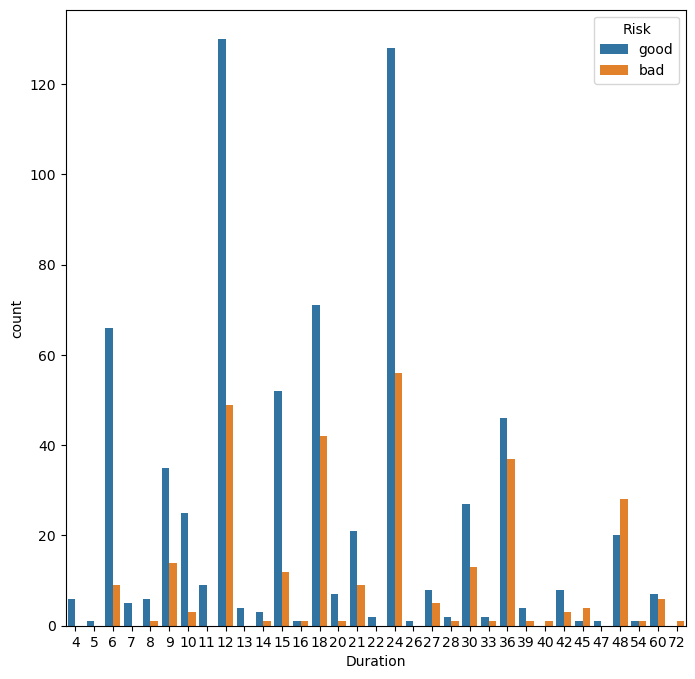

In [18]:
plt.figure(figsize = (8,8))
sns.countplot(x = df['Duration'], hue = df['Risk'])

<Axes: xlabel='Sex', ylabel='count'>

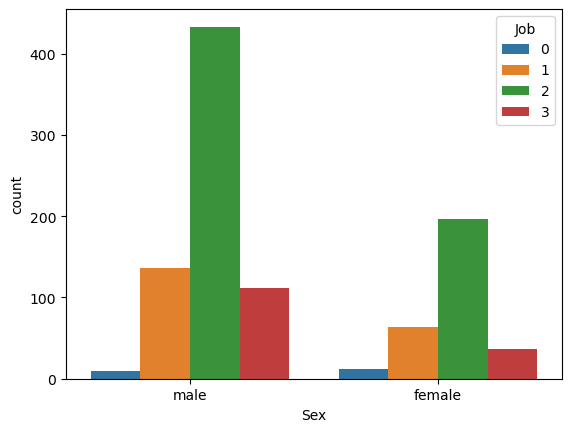

In [19]:
sns.countplot(x = df['Sex'],hue = df['Job'])

<Axes: xlabel='Risk', ylabel='count'>

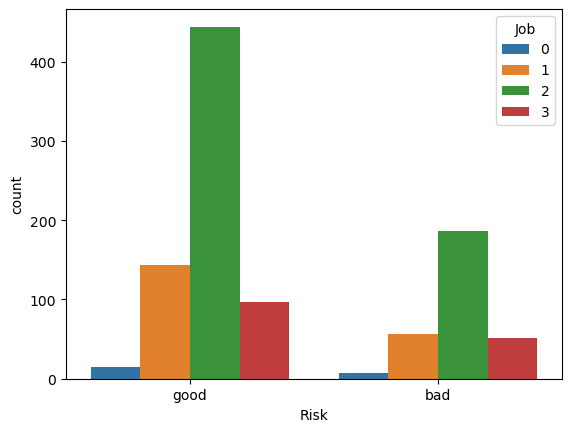

In [20]:
sns.countplot(x = df['Risk'],hue = df['Job'])

<Axes: xlabel='Risk', ylabel='count'>

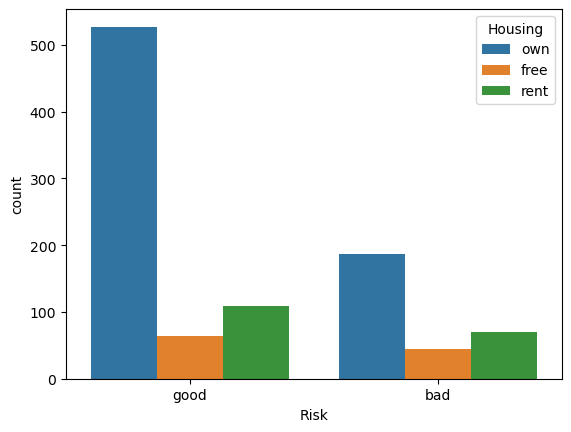

In [21]:
sns.countplot(x = df['Risk'],hue = df['Housing'])

In [22]:
df.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,Unknown,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,Unknown,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [23]:
a = df['Purpose'].unique()

In [24]:
list(enumerate(a))

[(0, 'radio/TV'),
 (1, 'education'),
 (2, 'furniture/equipment'),
 (3, 'car'),
 (4, 'business'),
 (5, 'domestic appliances'),
 (6, 'repairs'),
 (7, 'vacation/others')]

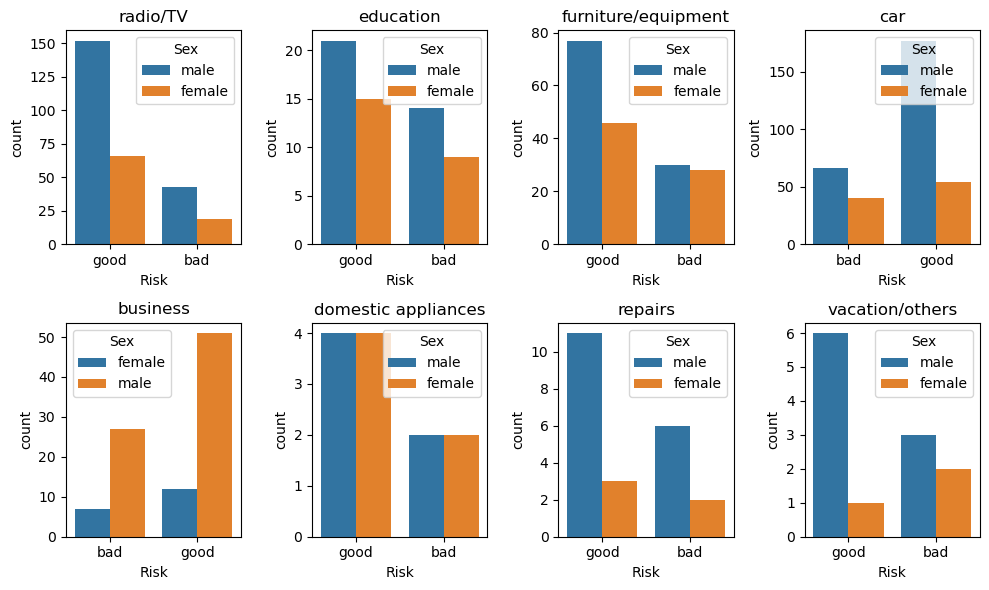

In [31]:
plt.figure(figsize=(10,6))
for i in enumerate(a):
    plt.subplot(2,4,i[0]+1)
    sns.countplot(x = df[df['Purpose'] == i[1]]['Risk'],hue = df[df['Purpose']==i[1]]['Sex'])
    plt.title(i[1])
plt.tight_layout()

In [33]:
job = df['Job'].unique()
job

array([2, 1, 3, 0], dtype=int64)

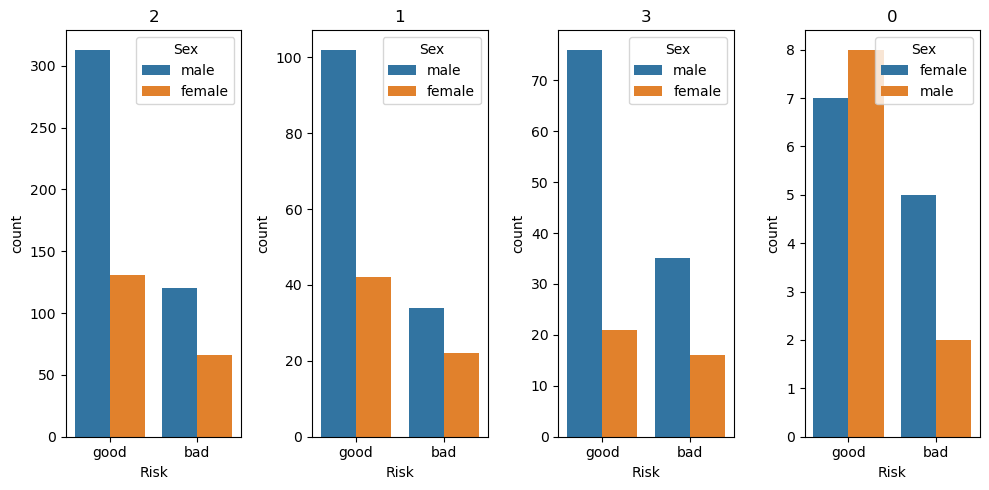

In [38]:
plt.figure(figsize=(10,5))
for i in enumerate(job):
    plt.subplot(1,4,i[0]+1)
    sns.countplot(x = df[df['Job'] == i[1]]['Risk'],hue = df[df['Job']==i[1]]['Sex'])
    plt.title(i[1])
plt.tight_layout()

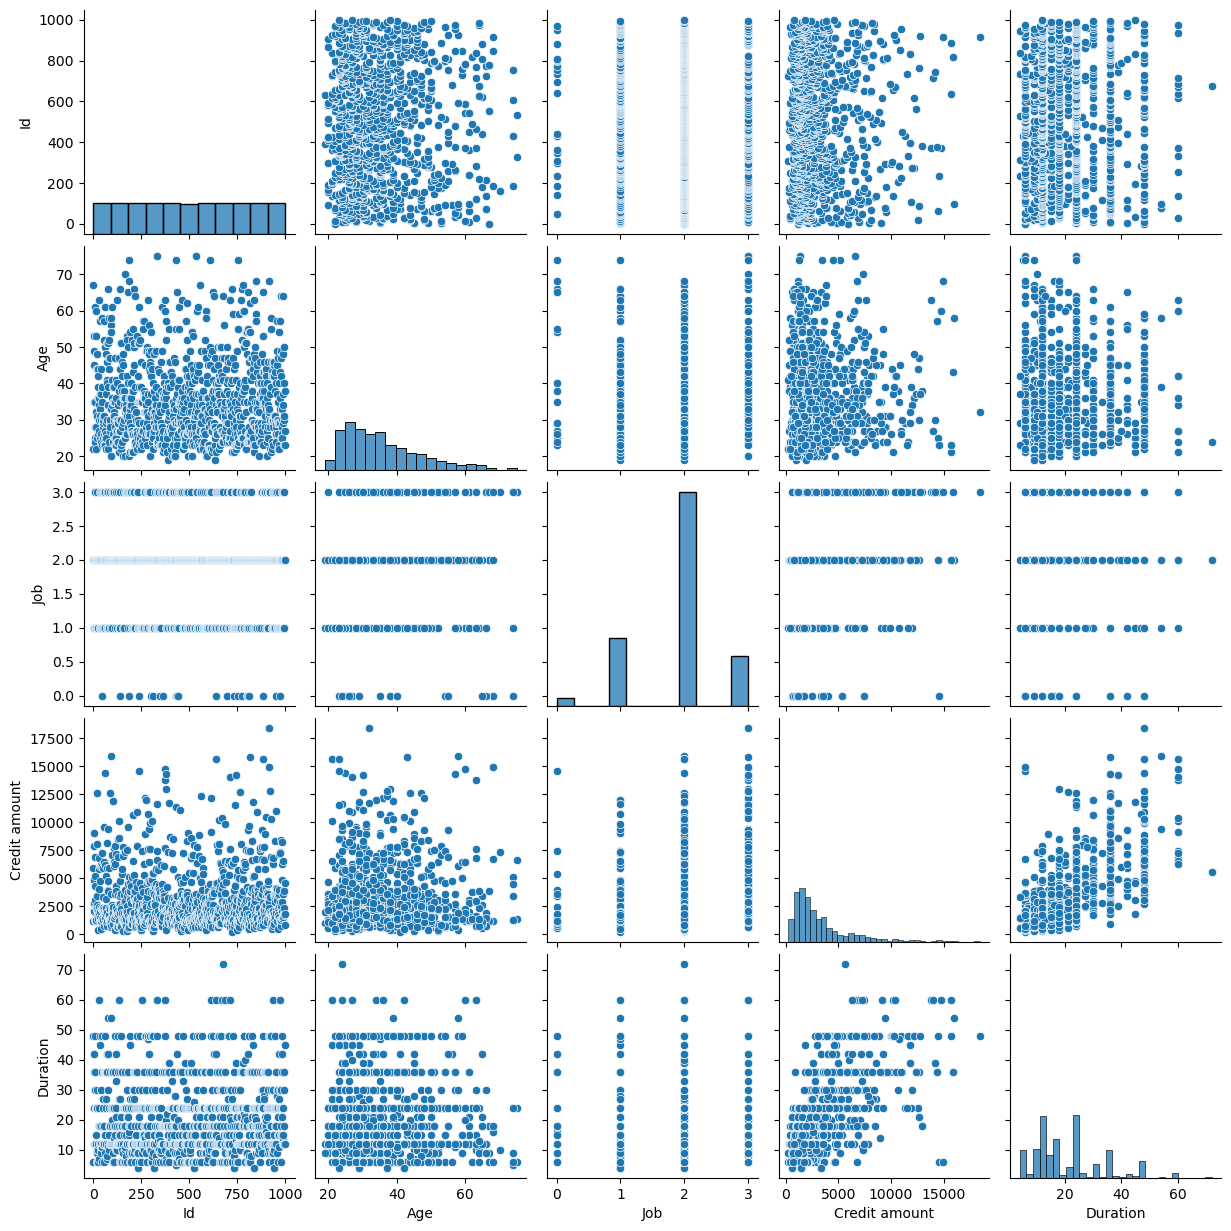

In [25]:
sns.pairplot(df)

In [26]:
newdf = pd.get_dummies(df['Purpose'],drop_first= True)
newdf.head()

,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0


In [27]:
df.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,Unknown,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,Unknown,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfle = df
dfle['Sex']=le.fit_transform(df['Sex'])
dfle['Saving accounts']=le.fit_transform(dfle['Saving accounts'])
dfle['Housing']=le.fit_transform(dfle['Housing'])
dfle['Checking account']=le.fit_transform(dfle['Checking account'])
dfle['Risk']=le.fit_transform(dfle['Risk'])

In [29]:
dfle = dfle.drop(columns = ['Purpose','Id'])

In [30]:
new_df=pd.concat([dfle,newdf],axis=1)
new_df.head(1)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,67,1,2,1,0,1,1169,6,1,0,0,0,0,1,0,0


In [31]:
for i in new_df:
    print(f"Unique vslues in {i} are: {new_df[i].unique()}")

Unique vslues in Age are: [67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52 50 46 51 41 40 66 47 56 54 20 21 38 70 65 74 68 43 55
 64 75 19 62 59]
Unique vslues in Sex are: [1 0]
Unique vslues in Job are: [2 1 3 0]
Unique vslues in Housing are: [1 0 2]
Unique vslues in Saving accounts are: [0 1 3 4 2]
Unique vslues in Checking account are: [1 2 0 3]
Unique vslues in Credit amount are: [ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430  2134  2647  2241  1804
  2069  1374   426   409  2415  6836  1913  4020  5866  1264  1474  4746
  6110  2100  1225   458  2333  1158  6204  6187  6143  1393  2299  1352
  7228  2073  5965  1262  3378  2225   783  6468  9566  1961  6229  1391
  1537  1953 14421  3181  5190  2171  1007  1819  2394  8133   730  1164
  5954  1977  1526  3965  4771  9436  3832  5943  1213  1568  1755  2315
  1412 12612  2249  1108   618  1409   797  3617  1318 1594

<Axes: >

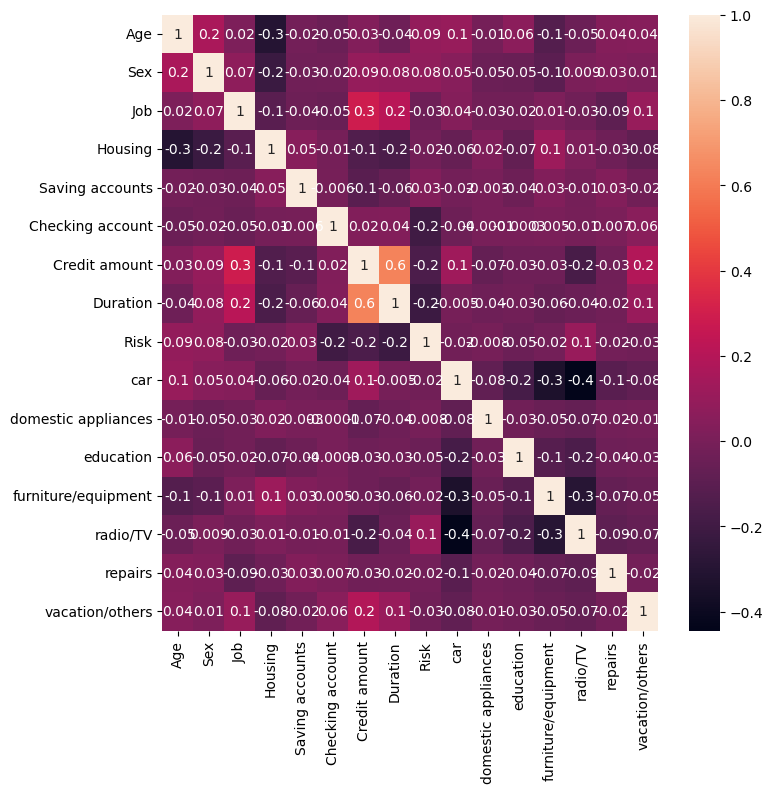

In [32]:
plt.figure(figsize = (8,8))
sns.heatmap(new_df.corr(),annot = True,fmt = '.1g')

In [33]:
X = new_df.drop(columns = ['Risk'])
y = new_df['Risk']

In [34]:
from sklearn.preprocessing import StandardScaler


In [35]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)
X.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,2.766456,0.670280,0.146949,-0.133710,-1.231393,-0.001045,-0.745131,-1.236478,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
1,-1.191404,-1.491914,0.146949,-0.133710,-0.196609,1.044372,0.949817,2.248194,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
2,1.183312,0.670280,-1.383771,-0.133710,-0.196609,-1.046463,-0.416562,-0.738668,-0.712949,-0.110208,3.993639,-0.470108,-0.623610,-0.149983,-0.110208
3,0.831502,0.670280,0.146949,-2.016956,-0.196609,-0.001045,1.634247,1.750384,-0.712949,-0.110208,-0.250398,2.127172,-0.623610,-0.149983,-0.110208
4,1.535122,0.670280,0.146949,-2.016956,-0.196609,-0.001045,0.566664,0.256953,1.402626,-0.110208,-0.250398,-0.470108,-0.623610,-0.149983,-0.110208


In [36]:
from sklearn.model_selection import train_test_split


In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [39]:
param={'max_depth':list(range(1,10)),'n_jobs':[1,2],'random_state':list(range(1,10))}

In [40]:
clf=GridSearchCV(RandomForestClassifier(),param,cv=2,scoring='accuracy')

In [41]:
clf.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_jobs': [1, 2],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [42]:
print(f'Best estimator is: {clf.best_estimator_}')
print(f'Best parameters are: {clf.best_params_}')
print(f'Best score is: {clf.best_score_}')

Best estimator is: RandomForestClassifier(max_depth=6, n_jobs=1, random_state=6)
Best parameters are: {'max_depth': 6, 'n_jobs': 1, 'random_state': 6}
Best score is: 0.73875


In [43]:
model = RandomForestClassifier(max_depth=6, n_jobs=2, random_state= 1)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, n_jobs=2, random_state=1)

In [44]:
y_pred = model.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [46]:
print(f'Accuracy score is : \n{accuracy_score(y_test,y_pred)}')
print(f'Confusion metrics: \n{confusion_matrix(y_test,y_pred)}')
print(f'Classification report:\n{classification_report(y_test,y_pred)}')
print(f'Cross val score:{np.mean(cross_val_score(RandomForestClassifier(),X_train,y_train,cv=3))}')

Accuracy score is : 
0.725
Confusion metrics: 
[[ 10  51]
 [  4 135]]
Classification report:
              precision    recall  f1-score   support

           0       0.71      0.16      0.27        61
           1       0.73      0.97      0.83       139

    accuracy                           0.73       200
   macro avg       0.72      0.57      0.55       200
weighted avg       0.72      0.72      0.66       200

Cross val score:0.7025006336064882


<Axes: >

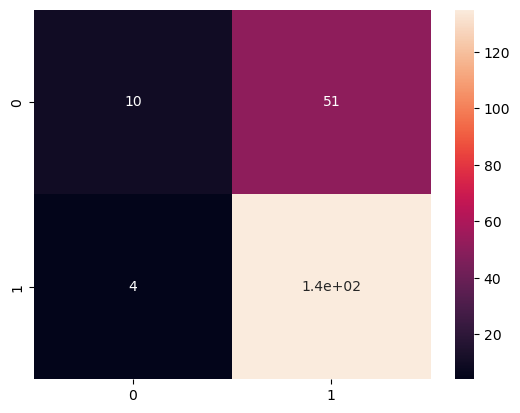

In [47]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)

In [48]:
from sklearn.svm import SVC

In [49]:
param_grid = {'C':[0.72,1],'degree':[3,4,5],'kernel':['linear', 'poly', 'rbf', 'sigmoid']}

In [50]:
clf = GridSearchCV(SVC(),param_grid,cv=3,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.72, 1], 'degree': [3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [51]:
print(f'Best estimator is: {clf.best_estimator_}')
print(f'Best parameters are: {clf.best_params_}')
print(f'Best score is: {clf.best_score_}')

Best estimator is: SVC(C=1)
Best parameters are: {'C': 1, 'degree': 3, 'kernel': 'rbf'}
Best score is: 0.7112631766682624


In [52]:
modelsvc = SVC(C=1,degree=3,kernel='rbf')
modelsvc.fit(X_train,y_train)
y_pred = modelsvc.predict(X_test)

In [53]:
print(f'Accuracy score is : \n{accuracy_score(y_test,y_pred)}')
print(f'Confusion metrics: \n{confusion_matrix(y_test,y_pred)}')
print(f'Classification report:\n{classification_report(y_test,y_pred)}')
print(f'Cross val score:{np.mean(cross_val_score(SVC(),X_train,y_train,cv=3))}')

Accuracy score is : 
0.685
Confusion metrics: 
[[  4  57]
 [  6 133]]
Classification report:
              precision    recall  f1-score   support

           0       0.40      0.07      0.11        61
           1       0.70      0.96      0.81       139

    accuracy                           0.69       200
   macro avg       0.55      0.51      0.46       200
weighted avg       0.61      0.69      0.60       200

Cross val score:0.7112631766682624


In [54]:
from sklearn.linear_model import LogisticRegression

modellog = LogisticRegression()
modellog.fit(X_train,y_train)
y_pred = modellog.predict(X_test)



In [55]:
print(f'Accuracy score is : \n{accuracy_score(y_test,y_pred)}')
print(f'Confusion metrics: \n{confusion_matrix(y_test,y_pred)}')
print(f'Classification report:\n{classification_report(y_test,y_pred)}')
print(f'Cross val score:{np.mean(cross_val_score(LogisticRegression(),X_train,y_train,cv=3))}')

Accuracy score is : 
0.7
Confusion metrics: 
[[  7  54]
 [  6 133]]
Classification report:
              precision    recall  f1-score   support

           0       0.54      0.11      0.19        61
           1       0.71      0.96      0.82       139

    accuracy                           0.70       200
   macro avg       0.62      0.54      0.50       200
weighted avg       0.66      0.70      0.62       200

Cross val score:0.7012756610627693


In [56]:
from sklearn.ensemble import AdaBoostClassifier
modelada = AdaBoostClassifier()
modelada.fit(X_train,y_train)
y_pred = modelada.predict(X_test)


In [57]:
print(f'Accuracy score is : \n{accuracy_score(y_test,y_pred)}')
print(f'Confusion metrics: \n{confusion_matrix(y_test,y_pred)}')
print(f'Classification report:\n{classification_report(y_test,y_pred)}')
print(f'Cross val score:{np.mean(cross_val_score(AdaBoostClassifier(),X_train,y_train,cv=3))}')

Accuracy score is : 
0.765
Confusion metrics: 
[[ 29  32]
 [ 15 124]]
Classification report:
              precision    recall  f1-score   support

           0       0.66      0.48      0.55        61
           1       0.79      0.89      0.84       139

    accuracy                           0.77       200
   macro avg       0.73      0.68      0.70       200
weighted avg       0.75      0.77      0.75       200

Cross val score:0.7100288173617565


In [58]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Support Vector Machine', SVC()),
    ('Random Forest calssifier', RandomForestClassifier()),
    ('AdaBooster Calssifier', AdaBoostClassifier())
]

scores_dict = {'Model': [], 'Score': []}

for model_name, model in models:
    scores = cross_val_score(model, X, y, cv=5)
    mean_score = scores.mean()
    
    scores_dict['Model'].append(model_name)
    scores_dict['Score'].append(mean_score)
scores_df = pd.DataFrame(scores_dict)
scores_df = scores_df.sort_values(by='Score', ascending=False)
scores_df

,Model,Score
2,Random Forest calssifier,0.742
3,AdaBooster Calssifier,0.730
1,Support Vector Machine,0.713
0,Logistic Regression,0.701


In [59]:

pca_x =scaler.fit_transform(X)

In [60]:
from sklearn.decomposition import PCA

In [61]:
pca=PCA(n_components=5)

In [62]:
train_x=pca.fit_transform(X_train)
test_x=pca.fit_transform(X_test)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:

logisticRegr = LogisticRegression(solver = 'lbfgs')

In [65]:
logisticRegr.fit(train_x,y_train)

LogisticRegression()

In [66]:
logisticRegr.score(train_x,y_train)

0.71125

In [67]:
pred = logisticRegr.predict(test_x)

In [68]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [69]:
confusion_matrix(y_test,y_pred)

array([[ 29,  32],
       [ 15, 124]], dtype=int64)

In [70]:
accuracy_score(y_test,y_pred)

0.765

In [71]:
new_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,67,1,2,1,0,1,1169,6,1,0,0,0,0,1,0,0
1,22,0,2,1,1,2,5951,48,0,0,0,0,0,1,0,0
2,49,1,1,1,1,0,2096,12,1,0,0,1,0,0,0,0
3,45,1,2,0,1,1,7882,42,1,0,0,0,1,0,0,0
4,53,1,2,0,1,1,4870,24,0,1,0,0,0,0,0,0


In [72]:
x = new_df.drop(columns =['Saving accounts','Checking account','Credit amount','Duration','Risk','Job'])
y = df['Risk']

In [74]:
x.head(5)

,Age,Sex,Housing,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,67,1,1,0,0,0,0,1,0,0
1,22,0,1,0,0,0,0,1,0,0
2,49,1,1,0,0,1,0,0,0,0
3,45,1,0,0,0,0,1,0,0,0
4,53,1,0,1,0,0,0,0,0,0


In [75]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: Risk, dtype: int32

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [77]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [78]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [79]:
y_pred = model.predict(x_test)

In [86]:
def getprediction():
    age1 = int(age.get())
    gender1 = gender.get()
    housing1 = housing.get()
    purpose1 = purpose.get()
    
    if gender1=='male':
        gender1=0
    else:
        gender1=1
    
    if housing1=='Own':
        own=1
        rent=0
        free=0
    elif housing1=='Rent':
        own=0
        rent=1
        free=0
    else:
        own=0
        rent=0
        free=1
        
    if purpose1=='car':
        car=1
        domestic_appliances=0
        education=0
        furniture_equipment=0
        radio_TV=0
        repairs=0
        vacation_others=0
    elif purpose1=='domestic_appliances':
        car=0
        domestic_appliances=1
        education=0
        furniture_equipment=0
        radio_TV=0
        repairs=0
        vacation_others=0
    elif purpose1=='education':
        car=0
        domestic_appliances=0
        education=1
        furniture_equipment=0
        radio_TV=0
        repairs=0
        vacation_others=0
    elif purpose1=='furniture_equipment':
        car=0
        domestic_appliances=0
        education=0
        furniture_equipment=1
        radio_TV=0
        repairs=0
        vacation_others=0
    elif purpose1=='radio_TV':
        car=0
        domestic_appliances=0
        education=0
        furniture_equipment=0
        radio_TV=1
        repairs=0
        vacation_others=0
    elif purpose1=='repairs':
        car=0
        domestic_appliances=0
        education=0
        furniture_equipment=0
        radio_TV=0
        repairs=1
        vacation_others=0
    else:
        car=0
        domestic_appliances=0
        education=0
        furniture_equipment=0
        radio_TV=0
        repairs=0
        vacation_others=1
    
    prediction = model.predict(scaler.transform([[age1,gender1,housing1,car,domestic_appliances,education,furniture_equipment,radio_TV,repairs,vacation_others]]))
    result.delete(0,END)
    
    if prediction[0]==1:
        result.insert(0,'No Risk Included')
    elif prediction[0]==0:
        result.insert(0,'Risk Inculded')
    else:
        result.insert(0,'ERROR')
    
    
    

In [87]:
from tkinter import *
from tkinter.ttk import Combobox

window = Tk()
window.geometry('400x500')

titlelabel = Label(window,text = 'German Credit Risk Analysis',bg = 'red').pack(fill = 'both')

Label(window).pack()
agelabel=Label(window,text='Age').pack()
age=Entry(window)
age.pack()

Label(window).pack()
genderlabel=Label(window,text='Gender').pack()
gender=Combobox(window)
gender['values']=('Male','Female')
gender.current(0)
gender.pack()

Label(window).pack()
housing=StringVar()
housing.set(1)
housinglabel=Label(window,text='Enter your housing type:').pack()
house=Combobox(window)
house['values']=('Own','Rent','Free')
house.current(0)
house.pack()

Label(window).pack()
purpose=StringVar()
purpose.set(1)
purposelabel=Label(window,text='Enter the purpose for taking loan').pack()
purp=Combobox(window)
purp['values']=('car','domestic appliances','education','furniture/equipment','radio/TV','repairs','vacation/others')
purp.current(0)
purp.pack()

Label(window).pack()               
button=Button(window,text='Get Prediction',command=getprediction).pack()
result=Entry(window)
result.pack()

window.mainloop()

E:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


***